LightGBM回归模型验证 - 使用加州房价数据集

In [2]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. 加载加州房价数据集（核心：这就是你要的数据集！）
print("="*50)
print("加载加州房价数据集...")
cal_housing = fetch_california_housing()
X, y = cal_housing.data, cal_housing.target

print(f"数据集信息:")
print(f"- 样本数量: {X.shape[0]}")
print(f"- 特征数量: {X.shape[1]}")
print(f"- 目标变量范围: [{y.min():.1f}, {y.max():.1f}] (单位: $100,000)")
print(f"- 特征名称: {cal_housing.feature_names}")

加载加州房价数据集...
数据集信息:
- 样本数量: 20640
- 特征数量: 8
- 目标变量范围: [0.1, 5.0] (单位: $100,000)
- 特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
# 2. 数据预处理
print("\n" + "="*50)
print("数据预处理...")
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("✓ 特征标准化完成")


数据预处理...
✓ 特征标准化完成


In [5]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"✓ 数据集划分完成: 训练集 {X_train.shape[0]} 样本, 测试集 {X_test.shape[0]} 样本")

✓ 数据集划分完成: 训练集 16512 样本, 测试集 4128 样本


In [6]:
# 4. 创建LightGBM数据集
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
print("✓ LightGBM数据集创建完成")

✓ LightGBM数据集创建完成


In [7]:
# 5. 设置参数
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}
print("✓ 模型参数设置完成")

✓ 模型参数设置完成


In [8]:
# 6. 训练模型（修复版本）
print("\n" + "="*50)
print("开始训练LightGBM模型...")
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)



开始训练LightGBM模型...
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.543347
[100]	valid_0's rmse: 0.484374
[150]	valid_0's rmse: 0.468131
[200]	valid_0's rmse: 0.45713
[250]	valid_0's rmse: 0.453564
[300]	valid_0's rmse: 0.450754
[350]	valid_0's rmse: 0.448024
[400]	valid_0's rmse: 0.445625
[450]	valid_0's rmse: 0.443995
[500]	valid_0's rmse: 0.442757
[550]	valid_0's rmse: 0.441469
[600]	valid_0's rmse: 0.440421
[650]	valid_0's rmse: 0.439376
[700]	valid_0's rmse: 0.438689
[750]	valid_0's rmse: 0.437726
Early stopping, best iteration is:
[744]	valid_0's rmse: 0.43772


In [9]:
# 7. 预测与评估
print("\n" + "="*50)
print("模型评估...")
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✓ 测试集RMSE: {rmse:.4f}")
print(f"✓ 测试集R²: {r2:.4f}")
print(f"✓ 最佳迭代次数: {model.best_iteration}")


模型评估...
✓ 测试集RMSE: 0.4377
✓ 测试集R²: 0.8538
✓ 最佳迭代次数: 744


In [10]:
# 8. 验证成功标志
print("\n" + "="*50)
if rmse < 0.8 and r2 > 0.7:
    print("✅ 验证成功! LightGBM模型表现良好")
    print(f"   期望范围: RMSE < 0.8, R² > 0.7")
    print(f"   实际结果: RMSE = {rmse:.4f}, R² = {r2:.4f}")
else:
    print("⚠️ 注意: 模型表现可能未达预期")
    print(f"   期望范围: RMSE < 0.8, R² > 0.7")
    print(f"   实际结果: RMSE = {rmse:.4f}, R² = {r2:.4f}")
    print("   建议: 调整参数或检查代码")


✅ 验证成功! LightGBM模型表现良好
   期望范围: RMSE < 0.8, R² > 0.7
   实际结果: RMSE = 0.4377, R² = 0.8538


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/3323573800.py:5: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/3323573800.py:5: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/3323573800.py:5: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/3323573800.py:5: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/3323573800.py:5: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4


✓ 特征重要性图已保存为 'feature_importance.png'


<Figure size 1200x800 with 0 Axes>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaV

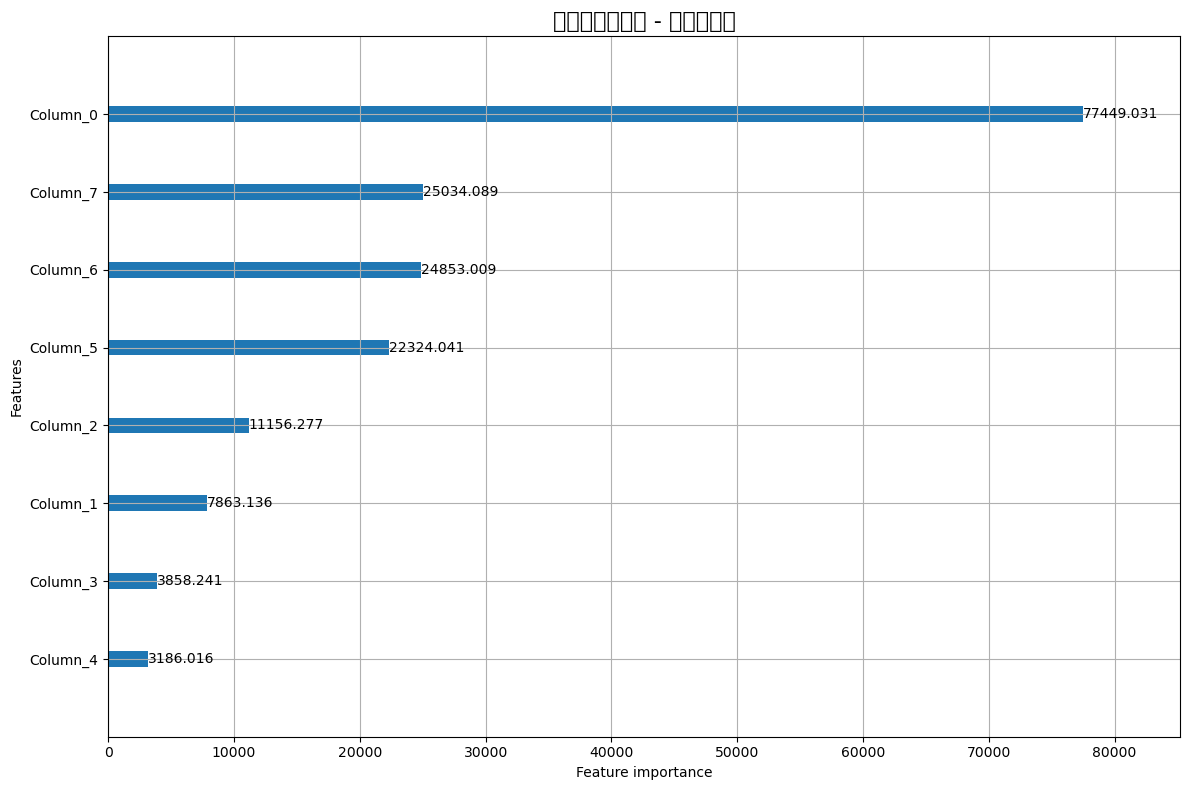

In [11]:
# 9. 特征重要性分析（可选，但推荐）
plt.figure(figsize=(12, 8))
lgb.plot_importance(model, max_num_features=8, importance_type='gain', figsize=(12, 8))
plt.title('加州房价数据集 - 特征重要性', fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ 特征重要性图已保存为 'feature_importance.png'")

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/2632646952.py:9: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/2632646952.py:9: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/2632646952.py:9: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/2632646952.py:9: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_63029/2632646952.py:9: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4

✓ 预测对比图已保存为 'prediction_vs_actual.png'

LightGBM回归验证完成!
数据集: California Housing Dataset
验证状态: 成功


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaV

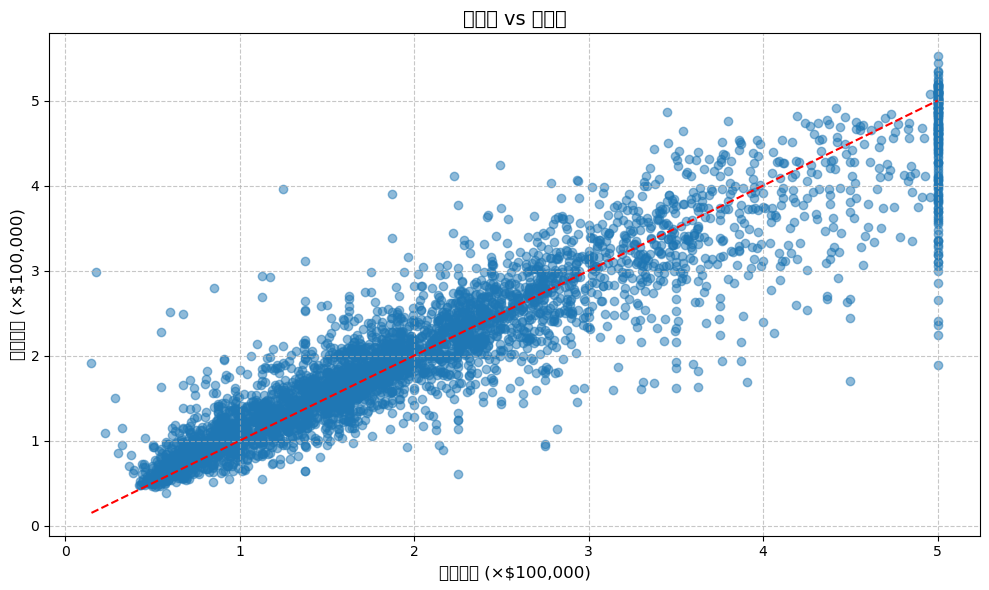

In [12]:
# 10. 预测值vs实际值图（可选，但推荐）
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('实际房价 (×$100,000)', fontsize=12)
plt.ylabel('预测房价 (×$100,000)', fontsize=12)
plt.title('预测值 vs 实际值', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('prediction_vs_actual.png', dpi=300, bbox_inches='tight')
print("✓ 预测对比图已保存为 'prediction_vs_actual.png'")

print("\n" + "="*50)
print("LightGBM回归验证完成!")
print("数据集: California Housing Dataset")
print("验证状态: 成功")